# Student Depression Prediction

## Importing Necessary Libraries / Modules

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, ConfusionMatrixDisplay, precision_recall_curve

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings("ignore")

## Loading The Dataset

In [32]:
df = pd.read_csv('Student_Depression_Dataset.csv')

In [33]:
df

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


## Investigating the Dataframe

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [35]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [36]:
df.duplicated().sum()

np.int64(0)

In [37]:
df.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

## Handling Missing Data

In [38]:
df.shape

(27901, 18)

In [39]:
df.dropna(inplace=True)

In [40]:
df.shape

(27898, 18)

## Dropping the Feature "id"

In [41]:
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [42]:
df.drop(columns=['id'], inplace=True)

In [43]:
df.columns

Index(['Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

## Encoding of Categorical Features

### Pre-Investigation of Data

In [44]:
df.shape

(27898, 17)

In [45]:
df

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


In [46]:
categorical_list = list(df.select_dtypes(include='object').columns)

In [47]:
categorical_list

['Gender',
 'City',
 'Profession',
 'Sleep Duration',
 'Dietary Habits',
 'Degree',
 'Have you ever had suicidal thoughts ?',
 'Family History of Mental Illness']

### Binary Mappings

In [48]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].map({'No': 0, 'Yes': 1})
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].map({'No': 0, 'Yes': 1})

### Ordinal Mappings

In [49]:
df['Sleep Duration'] = df['Sleep Duration'].replace({
    'Less than 5 hours': 0,
    '5-6 hours': 1,
    '7-8 hours': 2,
    'More than 8 hours': 3,
    'Others': 4
})

In [50]:
df['Dietary Habits'] = df['Dietary Habits'].replace({
    'Unhealthy': 0,
    'Moderate': 1,
    'Healthy': 2,
    'Others': 3
})

### Post-Investigation of Data

In [51]:
df.shape

(27898, 17)

In [52]:
df

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,1,2,B.Pharm,1,3.0,1.0,0,1
1,1,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,1,1,BSc,0,3.0,2.0,1,0
2,0,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,0,2,BA,0,9.0,1.0,1,0
3,1,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,2,1,BCA,1,4.0,5.0,1,1
4,1,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,1,1,M.Tech,1,1.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,1,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,1,0,Class 12,1,7.0,1.0,1,0
27897,0,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,0,2,MSc,0,0.0,3.0,1,0
27898,0,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,1,0,MD,0,12.0,2.0,0,0
27899,1,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,0,2,Class 12,1,10.0,5.0,0,1


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27898 entries, 0 to 27900
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27898 non-null  int64  
 1   Age                                    27898 non-null  float64
 2   City                                   27898 non-null  object 
 3   Profession                             27898 non-null  object 
 4   Academic Pressure                      27898 non-null  float64
 5   Work Pressure                          27898 non-null  float64
 6   CGPA                                   27898 non-null  float64
 7   Study Satisfaction                     27898 non-null  float64
 8   Job Satisfaction                       27898 non-null  float64
 9   Sleep Duration                         27898 non-null  int64  
 10  Dietary Habits                         27898 non-null  int64  
 11  Degree 

In [54]:
for col in df.select_dtypes(include='bool').columns:
    df[col] = df[col].astype(int)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27898 entries, 0 to 27900
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27898 non-null  int64  
 1   Age                                    27898 non-null  float64
 2   City                                   27898 non-null  object 
 3   Profession                             27898 non-null  object 
 4   Academic Pressure                      27898 non-null  float64
 5   Work Pressure                          27898 non-null  float64
 6   CGPA                                   27898 non-null  float64
 7   Study Satisfaction                     27898 non-null  float64
 8   Job Satisfaction                       27898 non-null  float64
 9   Sleep Duration                         27898 non-null  int64  
 10  Dietary Habits                         27898 non-null  int64  
 11  Degree 

In [56]:
df

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,1,2,B.Pharm,1,3.0,1.0,0,1
1,1,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,1,1,BSc,0,3.0,2.0,1,0
2,0,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,0,2,BA,0,9.0,1.0,1,0
3,1,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,2,1,BCA,1,4.0,5.0,1,1
4,1,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,1,1,M.Tech,1,1.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,1,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,1,0,Class 12,1,7.0,1.0,1,0
27897,0,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,0,2,MSc,0,0.0,3.0,1,0
27898,0,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,1,0,MD,0,12.0,2.0,0,0
27899,1,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,0,2,Class 12,1,10.0,5.0,0,1


## Data Visualization

### Target variable distribution

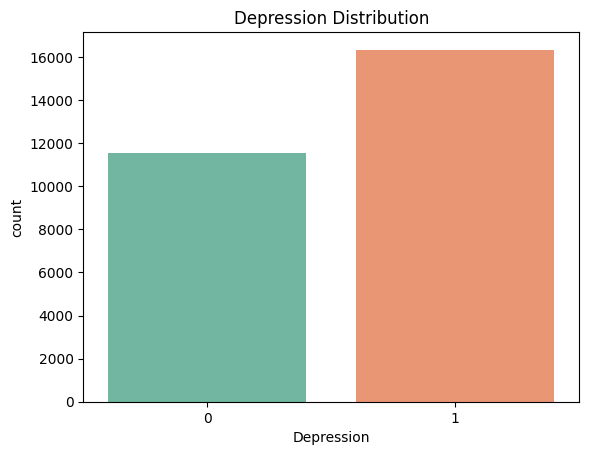

In [57]:
sns.countplot(x='Depression', data=df, palette='Set2')
plt.title("Depression Distribution")
plt.show()

### Gender vs Depression

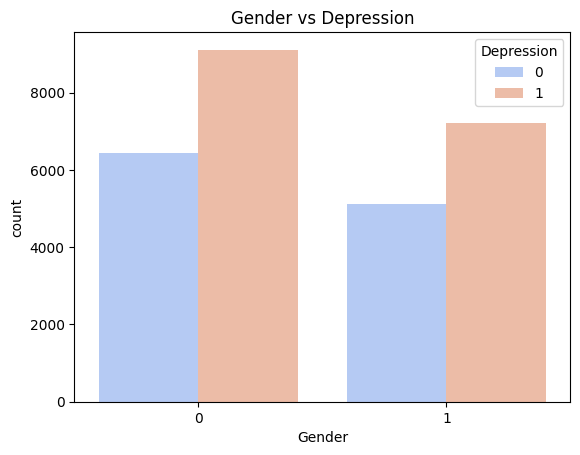

In [58]:
sns.countplot(x='Gender', hue='Depression', data=df, palette='coolwarm')
plt.title("Gender vs Depression")
plt.show()

### Sleep Duration vs Depression

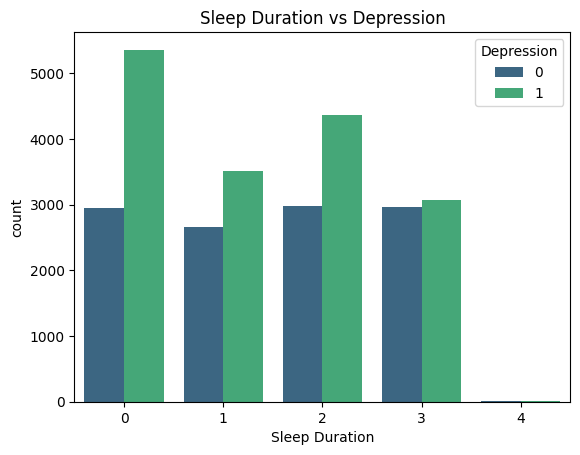

In [59]:
sns.countplot(x='Sleep Duration', hue='Depression', data=df, palette='viridis')
plt.title("Sleep Duration vs Depression")
plt.show()

## Splitting of Dataset

In [60]:
X = df.drop(columns=["Depression", "City", "Profession", "Degree"])
y = df["Depression"]

## Train-Test Split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Standard Scaler

In [62]:
scaler_std = StandardScaler()

In [63]:
X_train_std = scaler_std.fit_transform(X_train)

In [64]:
X_test_std = scaler_std.transform(X_test)

### MinMaxScaler

In [65]:
scaler_mm = MinMaxScaler()

In [66]:
X_train_mm = scaler_mm.fit_transform(X_train)

In [67]:
X_test_mm = scaler_mm.transform(X_test)

## Model Training

In [68]:
gnb = GaussianNB()
mnb = MultinomialNB(alpha=1.0)
bnb = BernoulliNB(alpha=1.0)
svc = SVC(kernel='linear', C=1.0, probability=True, random_state=42)
knc = KNeighborsClassifier(n_neighbors=5, weights='uniform')
dtc = DecisionTreeClassifier(max_depth=3, criterion='entropy', random_state=42)
lrc = LogisticRegression(solver='liblinear', penalty='l2', C=1.0, random_state=42)
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
abc = AdaBoostClassifier(n_estimators=100, random_state=42)
bc = BaggingClassifier(n_estimators=100, random_state=42)
etc = ExtraTreesClassifier(n_estimators=100, max_depth=3, random_state=42)
gbdt = GradientBoostingClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
lgbm = LGBMClassifier(n_estimators=100, random_state=42)

In [69]:
clfs = {
    'GNB': gnb,
    'MNB': mnb,
    'BNB': bnb,
    'SVC': svc,
    'KNN': knc,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'Bagging': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'XGB': xgb,
    'LGBM': lgbm
}

In [70]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # ROC-AUC
    if hasattr(clf, "predict_proba"):
        y_proba = clf.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_proba)
    else:
        roc_auc = None

    cm = confusion_matrix(y_test, y_pred)

    return accuracy, precision, recall, f1, roc_auc, cm

In [71]:
results = []
roc_curves = {}

In [72]:
for name, clf in clfs.items():
    if name == 'MNB':  # requires non-negative values
        acc, prec, rec, f1, roc_auc, cm = train_classifier(
            clf, X_train_mm, y_train, X_test_mm, y_test
        )
    else:
        acc, prec, rec, f1, roc_auc, cm = train_classifier(
            clf, X_train_std, y_train, X_test_std, y_test
        )

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1": f1,
        "ROC-AUC": roc_auc
    })

    if roc_auc is not None:
        y_proba = clf.predict_proba(
            X_test_std if name != 'MNB' else X_test_mm
        )[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_curves[name] = (fpr, tpr, roc_auc)

[LightGBM] [Info] Number of positive: 13068, number of negative: 9250
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000530 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 323
[LightGBM] [Info] Number of data points in the train set: 22318, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.585536 -> initscore=0.345543
[LightGBM] [Info] Start training from score 0.345543


In [73]:
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print(results_df)

       Model  Accuracy  Precision    Recall        F1   ROC-AUC
3        SVC  0.846237   0.845715  0.846237  0.845649  0.918514
11      GBDT  0.846057   0.845535  0.846057  0.845499  0.917797
8   AdaBoost  0.845878   0.845364  0.845878  0.845203  0.918569
6         LR  0.845699   0.845180  0.845699  0.845187  0.918349
13      LGBM  0.843190   0.842659  0.843190  0.842694  0.916042
7         RF  0.837276   0.836693  0.837276  0.836730  0.910337
12       XGB  0.833871   0.833286  0.833871  0.833370  0.910482
9    Bagging  0.829749   0.829116  0.829749  0.829191  0.903351
2        BNB  0.822222   0.821479  0.822222  0.821253  0.897381
4        KNN  0.819892   0.819123  0.819892  0.819111  0.877265
5         DT  0.819534   0.819928  0.819534  0.817247  0.875189
10       ETC  0.815412   0.817830  0.815412  0.811886  0.902038
1        MNB  0.782079   0.802253  0.782079  0.769780  0.877359
0        GNB  0.585305   0.342748  0.585305  0.432329  0.915211


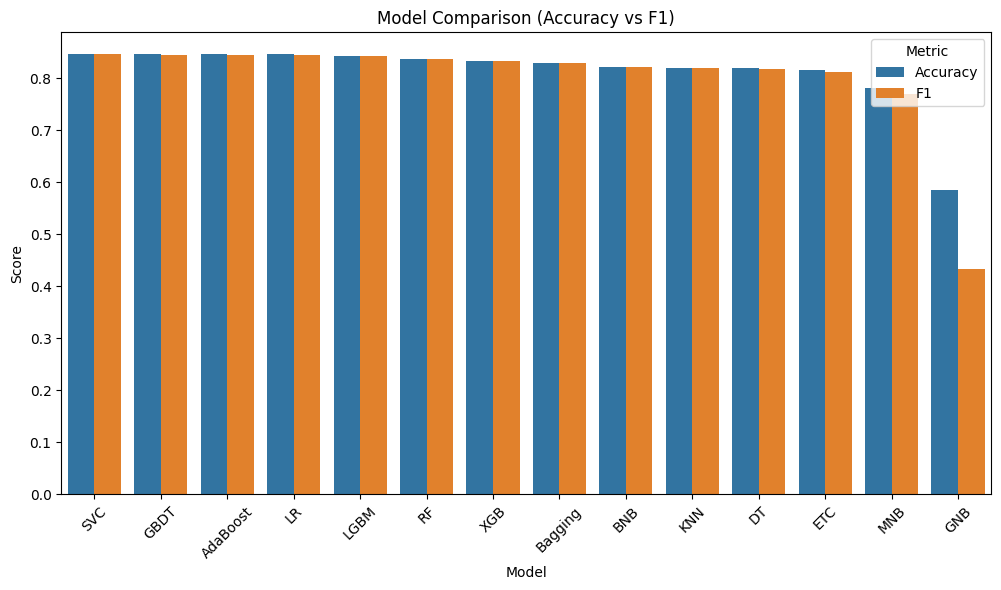

In [74]:
plt.figure(figsize=(12,6))
sns.barplot(data=results_df.melt(id_vars="Model", value_vars=["Accuracy", "F1"]),
            x="Model", y="value", hue="variable")
plt.title("Model Comparison (Accuracy vs F1)")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(title="Metric")
plt.show()

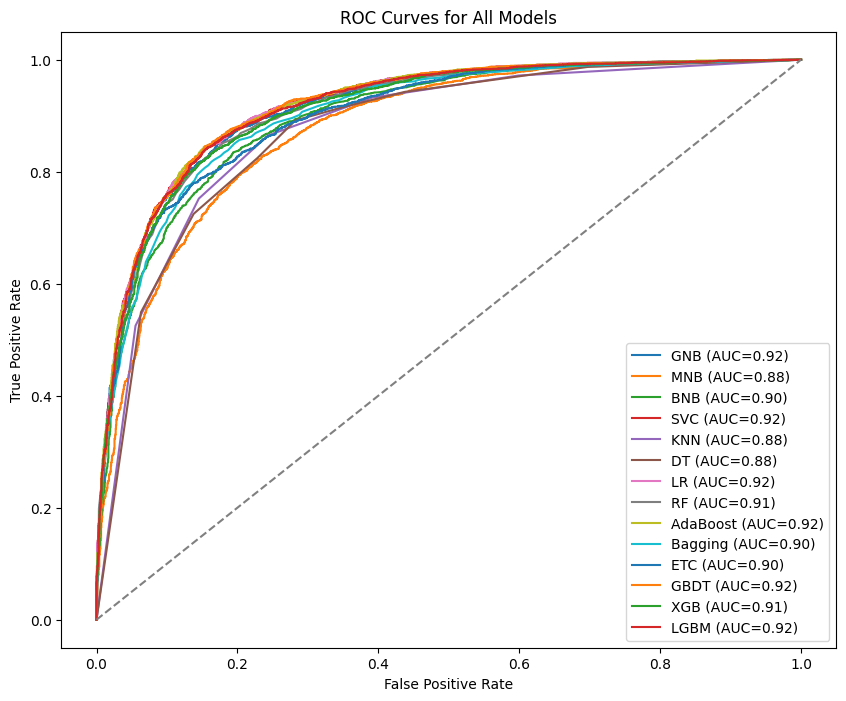

In [75]:
plt.figure(figsize=(10,8))
for name, (fpr, tpr, auc) in roc_curves.items():
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for All Models")
plt.legend()
plt.show()

## GridSearchCV

In [76]:
param_grid_lr = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear"]
}
grid_lr = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=1000),
    param_grid_lr,
    cv=5,
    scoring="f1",
    n_jobs=-1
)
grid_lr.fit(X_train_std, y_train)
print("Best LR Params:", grid_lr.best_params_, "Best F1:", grid_lr.best_score_)


Best LR Params: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'} Best F1: 0.8719680827707996


In [77]:
param_grid_svc = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf"],
    "gamma": ["scale", "auto"]
}
grid_svc = GridSearchCV(
    SVC(probability=True, random_state=42),
    param_grid_svc,
    cv=5,
    scoring="f1",
    n_jobs=-1
)
grid_svc.fit(X_train_std, y_train)
print("Best SVC Params:", grid_svc.best_params_, "Best F1:", grid_svc.best_score_)

Best SVC Params: {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'} Best F1: 0.873022635724082


In [78]:
param_grid_gbdt = {
    "n_estimators": [100, 200],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7]
}
grid_gbdt = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid_gbdt,
    cv=5,
    scoring="f1",
    n_jobs=-1
)
grid_gbdt.fit(X_train_std, y_train)
print("Best GBDT Params:", grid_gbdt.best_params_, "Best F1:", grid_gbdt.best_score_)


Best GBDT Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200} Best F1: 0.872047549373238


In [79]:
param_grid_adaboost = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 1.0]
}
grid_ada = GridSearchCV(
    AdaBoostClassifier(random_state=42),
    param_grid_adaboost,
    cv=5,
    scoring="f1",
    n_jobs=-1
)
grid_ada.fit(X_train_std, y_train)
print("Best AdaBoost Params:", grid_ada.best_params_, "Best F1:", grid_ada.best_score_)

Best AdaBoost Params: {'learning_rate': 1.0, 'n_estimators': 200} Best F1: 0.8717268094583783


## Training Models with Hyperparameters

In [80]:
models = {
    "Logistic Regression": LogisticRegression(C=0.01, penalty="l2", solver="liblinear", random_state=42),
    "SVC": SVC(C=0.1, gamma="auto", kernel="rbf", probability=True, random_state=42),
    "GBDT": GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=200, random_state=42),
    "AdaBoost": AdaBoostClassifier(learning_rate=1.0, n_estimators=200, random_state=42),
}

In [81]:
results_new = []
roc_curves_new = {}

In [82]:
for name, clf in models.items():
    acc, prec, rec, f1, roc_auc, cm = train_classifier(
        clf, X_train_std, y_train, X_test_std, y_test
    )

    results_new.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1": f1,
        "ROC-AUC": roc_auc
    })

    if roc_auc is not None:
        y_proba = clf.predict_proba(
            X_test_std if name != 'MNB' else X_test_mm
        )[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_curves_new[name] = (fpr, tpr, roc_auc)

In [83]:
results_df_new = pd.DataFrame(results_new).sort_values(by="Accuracy", ascending=False)
print(results_df_new)

                 Model  Accuracy  Precision    Recall        F1   ROC-AUC
2                 GBDT  0.846953   0.846453  0.846953  0.846486  0.917606
1                  SVC  0.845878   0.845361  0.845878  0.845216  0.915602
3             AdaBoost  0.845520   0.844997  0.845520  0.844868  0.918569
0  Logistic Regression  0.845341   0.844827  0.845341  0.844863  0.918364


## Voting Classifier

In [84]:
best_lr = LogisticRegression(C=0.01, penalty="l2", solver="liblinear", random_state=42)
best_svc = SVC(C=0.1, gamma="auto", kernel="rbf", probability=True, class_weight="balanced", random_state=42)
best_gbdt = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=200, random_state=42)
best_AdaBoost = AdaBoostClassifier(learning_rate=1.0, n_estimators=200, random_state=42)

In [85]:
voting = VotingClassifier(
    estimators=[('svc', best_svc), ('gbdt', best_gbdt), ('ada', best_AdaBoost)],
    voting='soft',
)
voting.fit(X_train_std, y_train)

,estimators,"[('svc', ...), ('gbdt', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,C,0.1
,kernel,'rbf'
,degree,3
,gamma,'auto'
,coef0,0.0


In [86]:
y_pred = voting.predict(X_test_std)

In [87]:
print("Voting Accuracy:", accuracy_score(y_test, y_pred))

Voting Accuracy: 0.8473118279569892


In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81      2313
           1       0.86      0.88      0.87      3267

    accuracy                           0.85      5580
   macro avg       0.84      0.84      0.84      5580
weighted avg       0.85      0.85      0.85      5580



In [89]:
df['Depression'].value_counts(normalize=True)

Depression
1    0.585526
0    0.414474
Name: proportion, dtype: float64

## Dumping the Necessary Files

In [90]:
joblib.dump(voting, 'student_depression_model.pkl')

['student_depression_model.pkl']

In [91]:
joblib.dump(scaler_std, 'scaler.pkl')

['scaler.pkl']

In [92]:
joblib.dump(X.columns.tolist(), 'feature_columns.pkl')

['feature_columns.pkl']

## Author : Anshuman Dash